In [1]:
# Gets mean framewise displacement for response hetergeneity groupings
# Tests for differences in means and plots distributions
# Run this using the nbc_lab env

%matplotlib inline

# Libraries
import pandas as pd
from os.path import join, isdir, isfile, basename
import matplotlib.pyplot as plt
import seaborn as sns
from pyvttbl import Anova1way

sns.set_style('darkgrid')

/home/data/nbc/physics-learning/physics-learning/env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
subjname_path = '/home/data/nbc/physics-learning/data/first-level/'
path = join(subjname_path, '{subj}/session-{sess}/fci/fci-{run}/')
out_dir = '/home/data/nbc/physics-learning/physics-learning-fci-jbtemp/groupComparisons/'
group1 = [216, 218, 323, 330, 334, 335, 337, 339, 341, 347, 348, 453, 467, 572, 574, 598, 606, 607, 615, 623, 626, 627, 631, 634]
group2 = [103, 107, 219, 327, 336, 338, 451, 463, 470, 581, 586, 587, 608, 609, 613, 619, 620]
group3 = [215, 321, 349, 460, 468, 582, 585, 588, 595, 630]
group4 = [102, 212, 340, 455, 464, 503, 597, 617, 622, 629]
groups = [group1, group2, group3, group4]
sessions = ['1']
runs = ['0', '1', '2']
columns = ['Subject', 'Run', 'Group', 'AverageFD']
df_fd = pd.DataFrame(columns=columns)

In [3]:
for groupnum, group in enumerate(groups):
    for subj in group:
        subj = str(subj)
        for sess in sessions:
            for run in runs:
#                print("Processing group {0}, subject {1}, session {2}, run {3}".format(groupnum+1, subj, sess, run))
                sess_path = path.format(subj=subj, sess=sess, run=run)
                if isdir(sess_path):
                    fd_file = join(sess_path, "{0}-session-{1}-fd.txt".format(subj, sess))
                    if isfile(fd_file):
                        if subj == 102 and not run == 0:
                            pass
                        else:
                            df = pd.read_csv(fd_file)
                            avg = df.mean()
                            df_new = pd.DataFrame([[int(subj), int(run), groupnum+1, float(avg)]], columns=columns)
                            df_fd = df_fd.append(df_new)
#                            print df_fd
                    else:
                        print("\tNO fd file: {0} session {1} run {2}".format(subj, sess, run))
                elif not isdir(sess_path):
                    print("\tDir DNE: {0}".format(sess_path))
                else:
                    print("\tFAILURE.")

	NO fd file: 348 session 1 run 1


In [4]:
out_file = join(out_dir, "averagefd.csv")
df_fd.to_csv(out_file, sep='\t', index=False)

In [5]:
# separate dfs by group
fd1 = df_fd[df_fd['Group'] == 1]
fd2 = df_fd[df_fd['Group'] == 2]
fd3 = df_fd[df_fd['Group'] == 3]
fd4 = df_fd[df_fd['Group'] == 4]

# create data structure for one way ANOVA
fd_grp1 = fd1['AverageFD'].tolist()
fd_grp2 = fd2['AverageFD'].tolist()
fd_grp3 = fd3['AverageFD'].tolist()
fd_grp4 = fd4['AverageFD'].tolist()
data = [fd_grp1, fd_grp2, fd_grp3, fd_grp4]

# run ANOVA to test means
conditions_list = 'group1 group2 group3 group4'.split()
D = Anova1way()
D.run(data, conditions_list=conditions_list)
print D

Anova: Single Factor on Measure

SUMMARY
Groups   Count    Sum    Average   Variance  
group1      71   5.091     0.072   4.890e-04 
group2      51   3.185     0.062   4.450e-04 
group3      30   2.189     0.073   4.538e-04 
group4      30   2.755     0.092       0.002 

O'BRIEN TEST FOR HOMOGENEITY OF VARIANCE
Source of Variation      SS       df       MS         F     P-value   eta^2   Obs. power 
Treatments            3.695e-05     3   1.232e-05   2.593     0.054   0.042        0.620 
Error                 8.455e-04   178   4.750e-06                                        
Total                 8.825e-04   181                                                    

ANOVA
Source of Variation    SS     df       MS         F      P-value    eta^2   Obs. power 
Treatments            0.016     3       0.005   8.213   3.775e-05   0.122        0.984 
Error                 0.118   178   6.650e-04                                          
Total                 0.135   181                       

  Subject Run Group  AverageFD
0     216   0     1   0.054345
0     216   1     1   0.053453
0     216   2     1   0.063586
0     218   0     1   0.083923
0     218   1     1   0.142247


/home/data/nbc/physics-learning/physics-learning/env/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


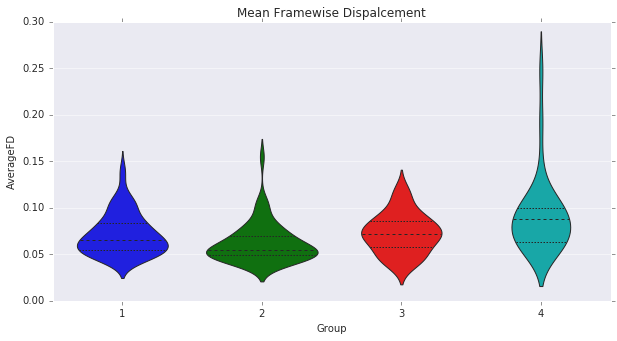

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.violinplot(x="Group", y="AverageFD", data=df_fd, inner="quart")
ax.set_title("Mean Framewise Dispalcement")
plt.savefig('meanFDgroups')
print df_fd.head()
fig.show()